In [1]:
from set_math import *

sympy imported
pandas imported
numpy imported
scipy imported
statsmodels imported
statsmodels.formula imported
statasmodels.stats.api imported


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from set_visualization import *

matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary


# load dataset

train2.csv 파일 경로 : dss7-walmart-project/model_generation/wy

In [3]:
df = pd.read_csv('train2.csv', index_col=0)

In [4]:
print(df.shape)

(118694, 26)


In [5]:
def make_year(date):
    return int(date.split('-')[0])

def make_month(date):
    return int(date.split('-')[1])

def make_day(date):
    return int(date.split('-')[2])

def make_monthday(date):
    return (date.split('-')[1:3])

def dayofweek_num(dayofweek):
    if dayofweek == 'Mon':
        return 1
    elif dayofweek == 'Tue':
        return 2
    elif dayofweek == 'Wed':
        return 3
    elif dayofweek == 'Thi':
        return 4
    elif dayofweek == 'Fri':
        return 5
    elif dayofweek == 'Sat':
        return 6
    elif dayofweek == 'Sun':
        return 7

In [6]:
df['year'] = df['date'].apply(make_year)
df['month'] = df['date'].apply(make_month)
df['day'] = df['date'].apply(make_day)
df['dayofweek'] = df['dayofweek'].apply(dayofweek_num)
df['dayofweek'] = df['dayofweek'].astype(int)

In [ ]:
## 분포 그리기
# fig = plt.figure(figsize=(20, 15))
# for i in range(0,30):
#     plt.subplot(10, 3, i+1)
#     plt.hist(df[df.columns[i]], bins=50)
#     plt.xlabel(df.columns[i], fontsize = 20)
# plt.tight_layout()

# 카테고리형 독립변수만 고려

In [7]:
model_1 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)', data=df)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     3600.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:57:06   Log-Likelihood:            -1.0428e+05
No. Observations:              118694   AIC:                         2.090e+05
Df Residuals:                  118490   BIC:                         2.109e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.1059      0

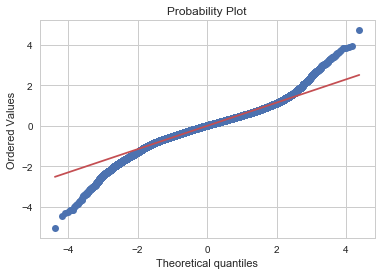

In [8]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

In [11]:
model_1 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)', data=df)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     3599.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:01:37   Log-Likelihood:            -1.0430e+05
No. Observations:              118694   AIC:                         2.090e+05
Df Residuals:                  118490   BIC:                         2.110e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0924 

# Leverage & Outlier 제거 작업

In [14]:
df_test = df

In [15]:
influence = result_1.get_influence()
influence

### Cook's Distance 를 통한 leverage, outlier 구하기


In [16]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df['units']) - 2)
drop_idx = np.where(cooks_d2 > fox_cr)[0]
len(drop_idx)

6710

### 해당 leverage&outlier 제외

In [17]:
df_test.drop(list(drop_idx),inplace=True)

In [18]:
df_test.reset_index(drop=True, inplace=True)

# 쿡스디스턴스를 통한 아웃라이어 제거 후

In [19]:
model_1 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     5268.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:20:08   Log-Likelihood:                -74581.
No. Observations:              111984   AIC:                         1.496e+05
Df Residuals:                  111780   BIC:                         1.515e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0580      0

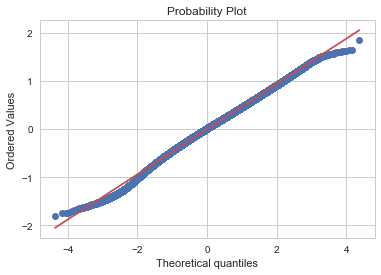

Chi^2       : 858.828
P-value     :  0.000


In [20]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

개선 됨을 볼 수 있다. 하지만 이 과정을 반복 한다고 해서 더 좋아지지는 않았다.

여전히 잔차의 정규성은 볼 수 없음

# 정규화 (sci-kit learn)

In [ ]:
from sklearn.datasets import make_regression
from patsy import dmatrices
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
# patsy를 통한 formula 생성
y, X = dmatrices( "np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)", df_test , return_type = 'dataframe' )

In [ ]:
# Linear Regression, Ridge, Lasso, ElasticNet
model1_LR = LinearRegression().fit(X, y)
model1_ridge = Ridge(alpha=0.5).fit(X, y)
model1_lasso = Lasso(alpha=0.5).fit(X, y)
model1_EN = ElasticNet(alpha=0.5).fit(X, y)

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model1_LR, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model1_EN, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

### 우리 모델은 Lasso, Elastic-Net하면 망하는가보오...

# 모델에 제출하기에 앞선 cross-validation 결과 및 RMSLE 채점 결과

In [ ]:
# RMSLE 구현 / 긁어왔습니다 
from sklearn.metrics import make_scorer
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

In [ ]:
y, X = dmatrices('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', df_test, return_type = 'dataframe')

model_LR = LinearRegression().fit(X, y)
model_ridge = Ridge().fit(X, y)
model_lasso = Lasso().fit(X, y)
model_EN = ElasticNet().fit(X, y)

In [ ]:
cross_val_score(model_ridge, X, y, cv=10, scoring=rmsle_score).mean()

최종 제출 시, 0.284점 예상

model_LR으로 테스트 할 때는 채점이 되지 않는 이유, 아직 모르겠습니다

0.1점대 밑으로 갈 생각을 안 허네요

# 제출을 위한 test파일 준비

### test file preprocessing

In [12]:
test = pd.read_csv('../../data/basic/test.csv')
print(test.shape)
test.head()

(526917, 3)


,date,store_nbr,item_nbr
0,2013-04-01,2,1
1,2013-04-01,2,2
2,2013-04-01,2,3
3,2013-04-01,2,4
4,2013-04-01,2,5


In [ ]:
key = pd.read_csv('../../data/basic/key.csv')
weather = pd.read_csv('../../data/weather_v8_with_holiday.csv')

In [ ]:
test = pd.merge(test, key)

In [ ]:
test = pd.merge(test, weather)

In [ ]:
test.columns

In [ ]:
test = pd.DataFrame(test, columns=['date','dayofweek', 'is_holiday', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       ])

In [ ]:
test.head()

In [ ]:
def is_holiday(holiday):
    if holiday == 'holiday':
        return 1
    elif holiday == 'holiday_work':
        return 1
    elif holiday == "workday":
        return 0

In [ ]:
test['is_holiday'] = test['is_holiday'].apply(is_holiday)

In [ ]:
test['year'] = test['date'].apply(make_year)
test['month'] = test['date'].apply(make_month)
test['day'] = test['date'].apply(make_day)
test['dayofweek'] = test['dayofweek'].apply(dayofweek_num)

In [ ]:
test_sample = test.drop(columns=['date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb',
       'sunrise', 'sunset','depart',  'codesum', 'codesum_YN', 'snowfall',
       'stnpressure', 'sealevel','resultdir', 'avgspeed',
       'station_nbr', 'heat', 'cool', 'preciptotal', 'is_holiday', 'resultspeed'])

In [ ]:
test_sample.head()

In [ ]:
test_X_df = pd.DataFrame(columns=['item_nbr', 'store_nbr','dayofweek', 'year', 'month', 'day'])

for nbr in range(1, 45+1):
    store_nbr = df_test[df_test['store_nbr'].isin([nbr])]
    sold_item_list = list(store_nbr['item_nbr'].unique())
    sold_item_list

    test_store_nbr = test_sample[test_sample['store_nbr'].isin([nbr])]
    to_test_df = test_store_nbr[test_store_nbr['item_nbr'].isin(sold_item_list)]

    test_X_df = pd.concat([test_X_df, to_test_df], axis = 0)
    
test_X_df.shape

In [ ]:
test_X_df.head()

In [ ]:
test_X_df['store_nbr'] = test_X_df['store_nbr'].astype(int)
test_X_df['item_nbr'] = test_X_df['item_nbr'].astype(int)
test_X_df['year'] = test_X_df['year'].astype(int)
test_X_df['month'] = test_X_df['month'].astype(int)
test_X_df['day'] = test_X_df['day'].astype(int)
test_X_df['dayofweek'] = test_X_df['dayofweek'].astype(object)

In [ ]:
test_result = result_ridge.predict(test_X_df)

### create submission file

In [ ]:
result = pd.concat([test, test_result], axis=1)

In [ ]:
print(result.shape)
result.head()

In [ ]:
result['units'] = result[0]

In [ ]:
def itiszero(units):
    if units > 0:
        return units
    else:
        return 0

In [ ]:
result['units'] = result['units'].apply(itiszero)

In [ ]:
result['units'] = result['units'].astype(int)

In [ ]:
result = pd.DataFrame(data=result, columns=['store_nbr', 'item_nbr', 'date', 'units'])

In [ ]:
for col in result[['store_nbr', 'item_nbr']]:
    result[col] = result[col].astype(int)

In [ ]:
result['id'] = result['store_nbr'].astype(str)+'_'+result['item_nbr'].astype(str)+'_'+result['date'].astype(str)

In [ ]:
for_submission = result.loc[:,['id','units']]

In [ ]:
for_submission.head()

In [ ]:
for_submission.to_csv('submission_sample7.csv', index=False)

# samplesubmission3
### dayofweek , outlier 5번 제거 ==> 캐글 0.26513
 


 
# samplesubmission4
### dayofweek, year, month, day , outlier 5번 제거 ==> 캐글 0.25870

# samplesubmission5

### dayofweek, year, month, day, np.log(units) / outlier 5번 제거 ==> 캐글 0.33 (CV 결과도 좋지 않았음)

# samplesubmission6

### dayofweek, year, month, day, np.log(units) / cook's distance로 3번 제거 ==> 캐글 0.33

# samplesubmission7

### dayofweek, year, month, day, np.log(units) / cook's distance로 3번 제거, ridge 정규화 ==> 캐글 0.33 (CV 결과가 좋은 Ridge로 적용)